In [1]:
from math import sin, exp
def function(x):
    return sin(x/5.)*exp(x/10.)+5.*exp(-x/2.)

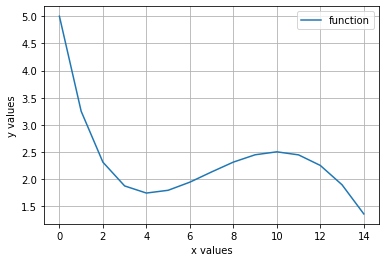

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x_values = np.arange(0,15)
funcvalues = [function(x) for x in x_values]
figure, ax = plt.subplots()
ax.plot(x_values, funcvalues, label='function')
ax.set_xlabel('x values')
ax.set_ylabel('y values')
ax.grid()
ax.legend()
plt.show()

Approximation of the original function with 3th and 4th degrees polynoms

[[  1   1   1]
 [ 64   8   1]
 [225  15   1]]


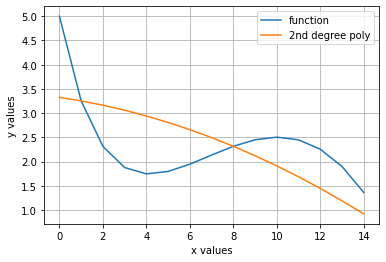

In [3]:
#В точках 1,9,15; затем в точках 1,4,10,15.
x_values2 = [1,8,15]
polynomvalues = [function(1),function(8),function(15)]
slaumatrix = np.array(list(([x*x,x,1] for x in x_values2)))
print(slaumatrix)
coeffs = np.linalg.solve(slaumatrix,polynomvalues)

ax.plot(x_values,np.polyval(coeffs, x_values), label= '2nd degree poly')
ax.legend()
display(figure)

In [4]:
x_values3 = [1,4,10,15]
polynomvalues2 = [function(1),function(4),function(10),function(15)]
slaumatrix2 = np.array(list(([x*x*x,x*x,x,1] for x in x_values3)))
print(slaumatrix2)
coeffs2 = np.linalg.solve(slaumatrix2,polynomvalues2)
print(coeffs2)
#проверка
print(np.polyfit(x_values3,polynomvalues2,3))

[[   1    1    1    1]
 [  64   16    4    1]
 [1000  100   10    1]
 [3375  225   15    1]]
[-0.00823565  0.19333685 -1.29552587  4.36264154]
[-0.00823565  0.19333685 -1.29552587  4.36264154]


[3.25221687 1.74684595 2.50541641 0.63522142]


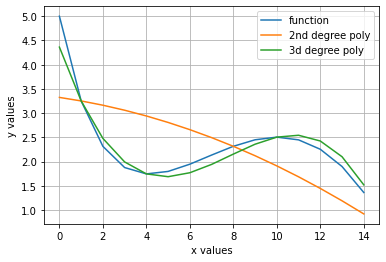

In [5]:
print(np.polyval(coeffs2, x_values3))
ax.plot(x_values,np.polyval(coeffs2, x_values),label= '3d degree poly')
ax.legend()
display(figure)

## Найдем минимум ф-ии на заданном промежутке используя scipy.optimize

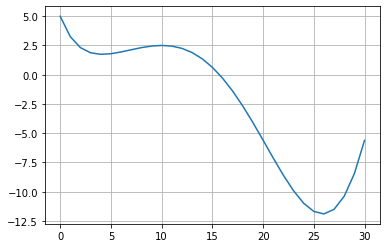

In [6]:
x_values = np.arange(0,31)
funcvalues = [function(x) for x in x_values]
plt.plot(x_values, funcvalues)
plt.grid()
plt.show()

In [7]:
import scipy.optimize as sp
fbounds = [(0,30)]
scipymin = sp.minimize(function, 10.1, bounds = fbounds)
print("X value:", scipymin.x,"Number of iterations:" ,scipymin.nit)
scipymin = sp.minimize(function, 10, bounds = fbounds)
print("X value:", scipymin.x,"Number of iterations:" ,scipymin.nit)

X value: [25.88019271] Number of iterations: 4
X value: [4.13628832] Number of iterations: 4


In [8]:
#с методом BFGS
scipymin = sp.minimize(function, 30, method = 'BFGS')
print("X value:", scipymin.x,"Number of iterations:" ,scipymin.nit)

X value: [25.88019339] Number of iterations: 6


In [9]:
#с методом дифференциальной эволюции
scipymin = sp.differential_evolution(function,bounds = fbounds, strategy='best1bin',mutation=0,seed=1, x0=10.1)
print(scipymin)

     fun: -11.898894665981288
     jac: array([1.77635669e-07])
 message: 'Optimization terminated successfully.'
    nfev: 42
     nit: 1
 success: True
       x: array([25.88019337])


## Пример минимизации негладкой ф-ии

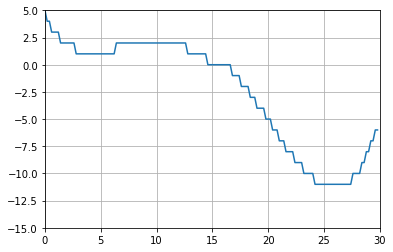

In [10]:
def function2(x):
    return int(function(x))
x_values4 = np.arange(0,30,0.2)
plt.plot(x_values4, [function2(x) for x in x_values4])
plt.grid()
plt.axis([0, 30, -15, 5])

plt.show()

In [11]:
#BFGS
scipymin = sp.minimize(function2, 10, method = 'BFGS')
print("X value:", scipymin.x,"Number of iterations:" ,scipymin.nit)
scipymin = sp.minimize(function2, 10.1, method = 'BFGS')
print("X value:", scipymin.x,"Number of iterations:" ,scipymin.nit)
#не работает

X value: [10.] Number of iterations: 0
X value: [10.1] Number of iterations: 0


In [12]:
#с методом дифференциальной эволюции
scipymin = sp.differential_evolution(function2,bounds = fbounds, strategy='best1bin',mutation=0,seed=1, x0=10)
print(scipymin)
#работает

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 32
     nit: 1
 success: True
       x: array([24.4089045])


## Работа с scipy.stats

In [13]:
import scipy.stats as sts

frdist = sts.expon(scale = 1 / 2) #лямбда = 2
sample = frdist.rvs(size=1000) 
#Вычислим теоретическое матожидание и стд отклонеине данного распределения
print("Mean:",frdist.mean(),".", "Deviation:", frdist.std())

Mean: 0.5 . Deviation: 0.5


#### Построение гистограммы выборки и графика теоритеческой плотности распределения случайной величины

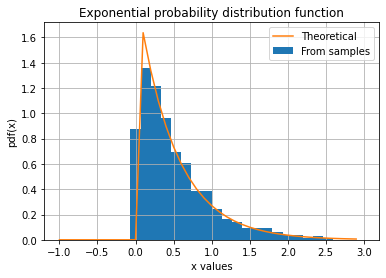

In [14]:
plt.hist(sample, bins = 30, range = [-1,3], density = True, label='From samples')
x_values = np.arange(-1,3,0.1)
plt.plot(x_values, [frdist.pdf(x) for x in x_values], label ='Theoretical')
plt.grid()
plt.title('Exponential probability distribution function')
plt
plt.xlabel('x values')
plt.ylabel('pdf(x)')
plt.legend()
plt.show()

### Генерация 1000 выборок объёма 5, 10, 50 и построение гистограммы распределений их выборочных средних

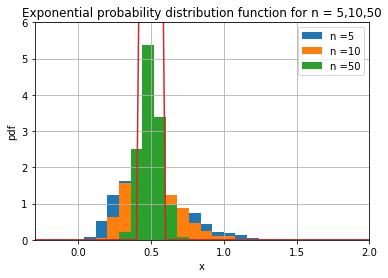

In [23]:
volume_array = [5,10,50]
for k in range(len(volume_array)):
    temp_array = []
    for i in range(1000):
        temp = frdist.rvs(volume_array[k])
        temp_array.append(temp.mean())
    plt.hist(temp_array, bins = 50, range = [-1,3], density = True, label ='n ='+ str(volume_array[k]))
    del temp_array
plt.title('Exponential probability distribution function for n = 5,10,50')
plt.grid(True)
plt.legend()
plt.axis([-0.3,2,0,6])
plt.xlabel('x')
plt.ylabel('pdf')
plt.plot(x_values,[sts.norm(loc=0.5, scale=0.5/50).pdf(x) for x in x_values])
plt.show()

##### ЦПТ в действии